In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [122]:
X = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\nilm\\kettle_input_test.dat', 
                header = 0, delim_whitespace = True, index_col = 0)
y = pd.read_csv('C:/Users/bfesc/Documents/Master_thesis/master_data/nilm/kettle_signatures_test.dat', 
                header = 0, delim_whitespace = True, index_col = 0)

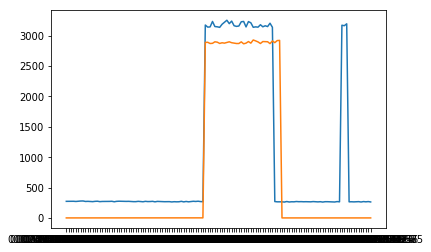

In [123]:
dice = np.random.randint(0,y.shape[0])
plt.plot(X.loc[dice])
plt.plot(y.loc[dice])
plt.show()

In [124]:
normalization = pd.read_csv('C:/Users/bfesc/Documents/Master_thesis/master_data/nilm/normalization_params.csv', header=0, delim_whitespace=True)
normalization.head()

,mean,sd
0,[[[ 505.60967371]]\n\n [[ 250.21105381]]\n\n [...,242.646964


In [125]:
X_np = np.array(X).reshape((X.shape[0],X.shape[1],1))
y_np = np.array(y).reshape((y.shape[0],y.shape[1]))

#mean = normalization['mean'].values[0]
mean = X_np.mean(axis=1).reshape(X_np.shape[0],1,1)
X_np = X_np - mean
sd = normalization['sd'].values[0]
#rand_sd = rand_sd.sample(frac=1).reset_index(drop=True)
X_np /= sd
print("Mean: ", X_np.mean())
print("Std: ", X_np.std())


Mean:  0.0
Std:  5.01947698366


In [172]:
from keras.models import load_model

model1 = load_model('C:/Users/bfesc/Documents/Master_thesis/master_data/nilm/models/model0128dAE.h5')
model2 = load_model('C:/Users/bfesc/Documents/Master_thesis/master_data/nilm/models/model0129dAE.h5')

## Model testing
Here model1 is the model trained on data including samples with no kettle signal present.
Model2 is trained solely on data including the kettle. All test data does (for now) include a kettle signal.

In [190]:
resolution = 6

In [173]:
pred1 = model1.predict(X_np)
pred2 = model2.predict(X_np)

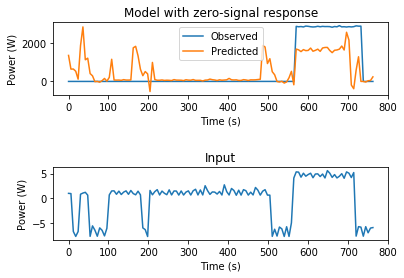

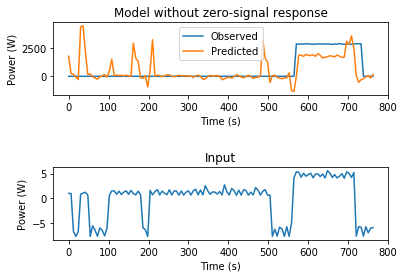

In [278]:
#first get an idea about the results:
x = np.arange(y_np.shape[1])*resolution
dice = np.random.randint(0,y_np.shape[0])
plt.subplot(211)
plt.plot(x, y_np[dice])
plt.plot(x, pred1[dice])
plt.title("Model with zero-signal response")
plt.ylabel("Power (W)")
plt.xlabel("Time (s)")
plt.legend(["Observed","Predicted"])
#plt.show()
plt.subplots_adjust(hspace=1)

plt.subplot(212)
plt.plot(x, X_np[dice])
plt.title("Input")
plt.ylabel("Power (W)")
plt.xlabel("Time (s)")
plt.show()

plt.subplot(211)
plt.plot(x, y_np[dice])
plt.plot(x, pred2[dice])
plt.title("Model without zero-signal response")
plt.ylabel("Power (W)")
plt.xlabel("Time (s)")
plt.legend(["Observed","Predicted"])
#plt.show()
plt.subplots_adjust(hspace=1)

plt.subplot(212)
plt.plot(x, X_np[dice])
plt.ylabel("Power (W)")
plt.title("Input")
plt.xlabel("Time (s)")
plt.show()

Thoughts on visualization:

Visualizing and explaining how well the denoiser does <b>on average</b> is not trivial. One idea which may work for the kettle's rectangular signature is to locate the beginning and end of the signal as well as the average power. This does not take into account multiple erroneous spikes in the prediction however.

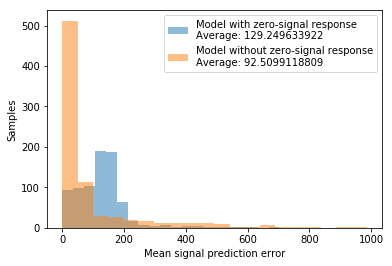

In [277]:
diff1 = pred1.reshape(y_np.shape) - y_np
diff2 = pred2.reshape(y_np.shape) - y_np

avg_diff1 = np.abs(diff1.mean(axis=1))
avg_diff2 = np.abs(diff2.mean(axis=1))

plt.hist(avg_diff1, alpha=0.5, bins=20)
plt.hist(avg_diff2, alpha=0.5, bins=20)
plt.legend(["Model with zero-signal response\nAverage: " + str(avg_diff1.mean()),
            "Model without zero-signal response\nAverage: " + str(avg_diff2.mean())])
plt.xlabel("Mean signal prediction error")
plt.ylabel("Samples")
plt.show()

It appears that the model with zero-signal responses is less often completely correct, but also less often completely wrong (average absolute error > 250). Note that the model without zero-signal response was trained twice as long as the other, albeit with little apparent improval.

### Going forward:
1) Test with zero-signal response samples.<br>
2) Train model on more complex signals.

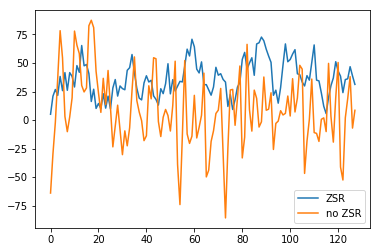

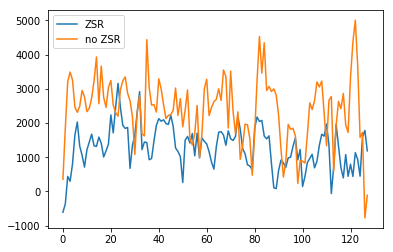

In [296]:
#not terribly interesting
noise_1 = np.random.rand(128)
noise_2 = np.random.rand(128)*10
noise = np.array([noise_1,noise_2]).reshape((2,128,1))

noise_pred = model1.predict(noise)
noise_pred2 = model2.predict(noise)

plt.plot(noise_pred1[0])
plt.plot(noise_pred2[0])
plt.legend(["ZSR", "no ZSR"])
plt.show()

plt.plot(noise_pred1[1])
plt.plot(noise_pred2[1])
plt.legend(["ZSR", "no ZSR"])
plt.show()